# Ensemble Techniques

This notebook will explore the four different ensemble techniques i.e.
1. Voting Ensemble Technique
2. Stacking Ensemble Technique
3. Bagging Ensemble Technique
4. Boosting Ensemble Technique

### First Import the important packages from  

In [162]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

### Preparing a sample dataset to use in different models 

<AxesSubplot:>

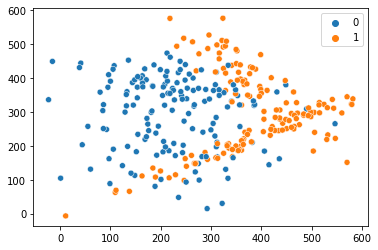

In [117]:
X, y = make_classification(n_samples=300,
                            n_features=2,n_informative=2,n_redundant=0,n_repeated=0,
                            n_classes=2,
                            n_clusters_per_class=2,weights=None,flip_y=0.01,
                            class_sep=.8,
                            hypercube=True,
                            shift=3.0,
                            scale=100.0,
                            shuffle=True,
                            random_state=None)
sb.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [118]:
df = pd.DataFrame(X, columns=['X1', 'X2'])
df["y"] = y
df.head()

,X1,X2,y
0,243.202405,180.202467,0
1,40.950478,444.545663,0
2,55.042172,257.779556,0
3,352.633363,348.672643,0
4,531.969591,232.723205,1


### Spliting the data into train and test sets

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)

### Analyzing how individual machine learning models perform on the dataset 

##### 1. Logistic Regression

In [120]:
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)
y_pred_logisticRegression = logisticRegression.predict(x_test)

<AxesSubplot:>

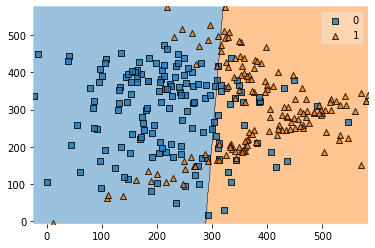

In [121]:
plot_decision_regions(X, y, clf=logisticRegression)

##### 2. KNN Algorithm

In [122]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred_KNN = KNN.predict(x_test)

<AxesSubplot:>

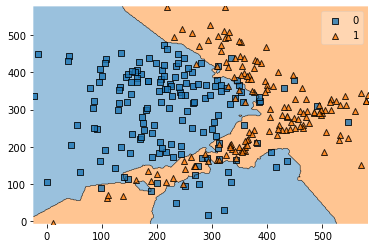

In [123]:
plot_decision_regions(X, y, clf=KNN)

##### 3. Decision Tree

In [124]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)
y_pred_decisionTree = decisionTree.predict(x_test)

<AxesSubplot:>

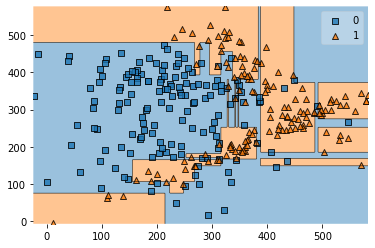

In [125]:
plot_decision_regions(X, y, clf=decisionTree)

In [126]:
# Prediction score of all the above algorithms

print("Logistic Regression accuracy score = "+str(accuracy_score(y_test, y_pred_logisticRegression)))
print("K Nearest Neighbors accuracy score = "+str(accuracy_score(y_test, y_pred_KNN)))
print("Decision Tree accuracy score = "+str(accuracy_score(y_test, y_pred_decisionTree)))


Logistic Regression accuracy score = 0.8266666666666667
K Nearest Neighbors accuracy score = 0.9066666666666666
Decision Tree accuracy score = 0.8533333333333334


### Analyzing ensemble techniques 

##### 1. Voting Ensemble Technique

In [127]:
# Taking the above algoriths as estimaters in Voting 
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
Voting = VotingClassifier(estimators=[('lr', clf1), 
                                      ('dt', clf2), 
                                      ('knn', clf3)], 
                                      voting='hard', n_jobs=-1)
Voting.fit(x_train, y_train)
y_pred_Voting = Voting.predict(x_test)


<AxesSubplot:>

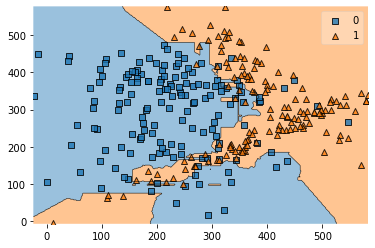

In [128]:
plot_decision_regions(X, y, clf=Voting)

In [129]:
print("Voting Ensemble Technique accuracy score = "+str(accuracy_score(y_test, y_pred_Voting)))


Voting Ensemble Technique accuracy score = 0.92


##### 2. Stacking Ensemble Technique

In [149]:
# Taking the above algoriths as estimaters in Stacking 
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
stacking = StackingClassifier(estimators=[('knn', clf2),  
                                      ('dt', clf3)], 
                                      final_estimator=clf1, n_jobs=-1)
stacking.fit(x_train, y_train)
y_pred_stacking = stacking.predict(x_test)

<AxesSubplot:>

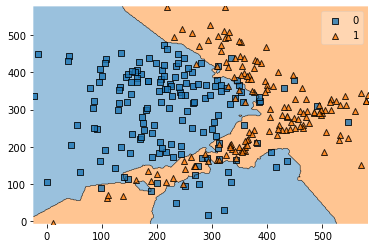

In [150]:
plot_decision_regions(X, y, clf=stacking)

In [151]:
print("Stacking Ensemble Technique accuracy score = "+str(accuracy_score(y_test, y_pred_stacking)))


Stacking Ensemble Technique accuracy score = 0.9066666666666666


##### 3. Bagging Ensemble Technique

In [ ]:
# we will use Knn as our base_estimator
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier())
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

<AxesSubplot:>

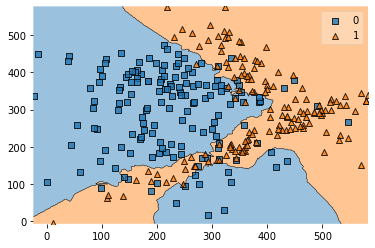

In [156]:
plot_decision_regions(X, y, clf=bagging)

In [155]:
print("Bagging Ensemble Technique accuracy score = "+str(accuracy_score(y_test, y_pred_bagging)))


Bagging Ensemble Technique accuracy score = 0.92


##### 4. Boosting Ensemble Technique

In [169]:
# we will use Decision Tree as our base_estimator
boosting = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)

<AxesSubplot:>

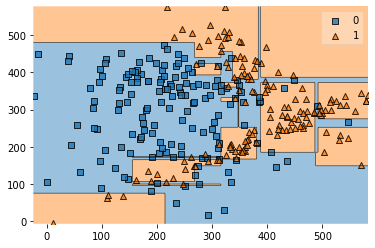

In [170]:
plot_decision_regions(X, y, clf=boosting)

In [171]:
print("Boosting Ensemble Technique accuracy score = "+str(accuracy_score(y_test, y_pred_boosting)))


Boosting Ensemble Technique accuracy score = 0.8533333333333334
